# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [4]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [6]:
X, y = make_blobs(n_features=50,centers=20,n_samples=20000,cluster_std=0.2,center_box=[-1,1],random_state=17)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [13]:
pca = PCA(n_components=2)
pca.fit(X_train)
res_pca = pca.transform(X_test)

Text(0.5, 0, 'Principal Component 2')

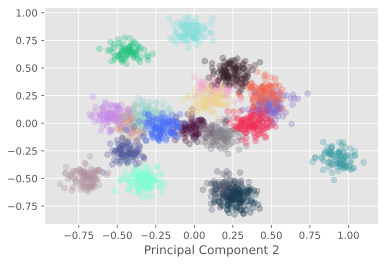

In [15]:
unique_labels = np.unique(y_test)

for index, unique_labels in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_labels]

    plt.scatter(X_data[:,0],X_data[:,1],alpha=0.3,c=cols[index])

plt.xlabel('Principal Component 1')
plt.xlabel('Principal Component 2')    

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

In [26]:
autoencoder = MLPRegressor(alpha = 1e-14,
                           hidden_layer_sizes=(50,100,50,2,50,100,50),
                           random_state=1,
                           max_iter=20000)
autoencoder.fit(X_train,X_train)                           

MLPRegressor(alpha=1e-14, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [28]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [29]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [36]:
# ENCODING
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [39]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    
    for index, (w, b) in enumerate(zip(encoder_weights,encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)

    return res_ae

res_ae = encode(encoder_weights, encoder_biases, X_test)                

In [41]:
res_ae.shape

(2000, 2)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

Text(0.5, 1.0, 'Autoencoder Results')

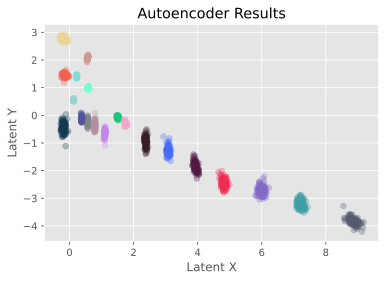

In [43]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]

    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.3,c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [44]:
#-1 to 1 (perfectly clustered)
silhouette_score(X_test,y_test)

0.6100948647899368

In [45]:
silhouette_score(res_pca,y_test)

0.36784181298327895

In [46]:
silhouette_score(res_ae,y_test)

0.7871881887026275